In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
filePath = "../docs/2018/final-results/"
outputPath = "../results/analysis/"

In [13]:
def makeGraph(name, metric):
    ext = "trec_eval"
    if(metric == "infNDCG"):
        ext = "sampleval"

    col_names = ['metric','topic','value']
    df = pd.read_csv(join(filePath, name + "." + ext), sep=r'\t+', header=None, names=col_names, 
                     dtype={'value':float}, engine='python')
    filtered = df.loc[df['metric'].str.match(metric, case=False) & ~df['topic'].str.match("all", case=False)]

    plt.figure()
    plt.scatter(filtered['topic'], filtered['value'])
    plt.xticks(rotation='vertical')
    plt.title(metric + " " + name);
    plt.axhline(filtered['value'].mean(), color='r', label="Mean: all topics");
    plt.savefig(join(outputPath,'experiment-'+name+"-"+metric+'.pdf'))

In [14]:
def makeMetricGraph(metric):
    ext = "trec_eval"
    if(metric == "infNDCG"):
         ext = "sampleval"

    fileNames = [f for f in listdir(filePath) if isfile(join(filePath, f)) and f[-9:] == ext]

    colors=["red","blue","black","yellow","purple"]
    markers=["o","^","*","X","p"]

    plt.figure()
    plt.xticks(rotation='vertical')
    plt.title(metric)

    allTopics = np.zeros(5)
    for file in fileNames:
        col_names = ['metric','topic','value']
        df = pd.read_csv(join(filePath, file), sep=r'\t+', header=None, names=col_names, 
                         dtype={'value':float}, engine='python')
        filtered = df.loc[df['metric'].str.match(metric, case=False) & ~df['topic'].str.match("all", case=False)]
        allTopics = df.loc[df['metric'].str.match(metric, case=False) & df['topic'].str.match("all", case=False)]['value']
        plt.scatter(filtered['topic'], filtered['value'], c=colors.pop(), alpha=0.5, marker=markers.pop(), label=file[:-10])

    plt.axhline(allTopics.mean(), color='r', label="Mean: all topics & runs");
    plt.legend(loc='best')
    plt.savefig(join(outputPath,'experiment-'+metric+'.pdf'))

In [15]:
metrics=["P10 ","R-prec","infNDCG"]
runs=["hpipubcommon","hpipubbase","hpipubnone","hpipubclass","hpipubboost"]

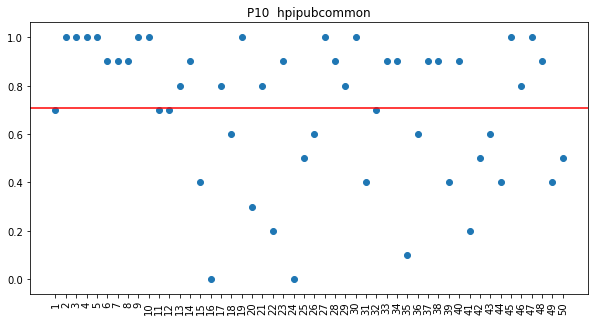

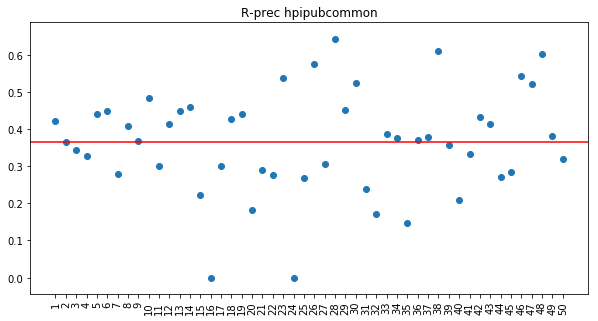

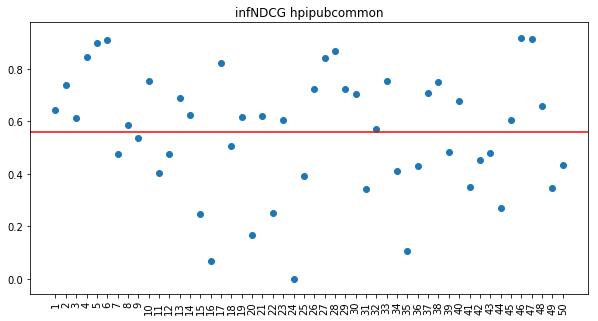

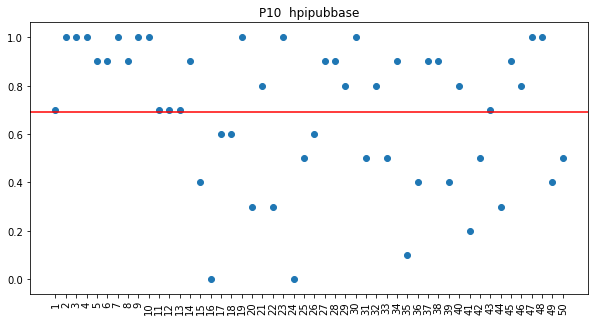

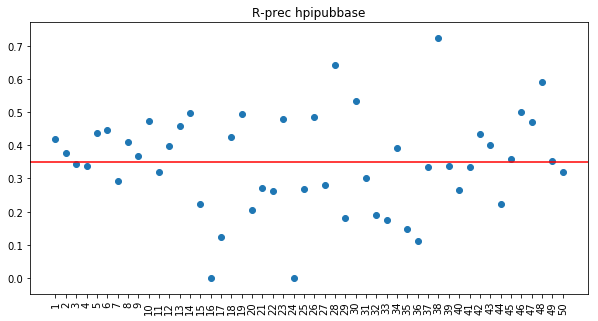

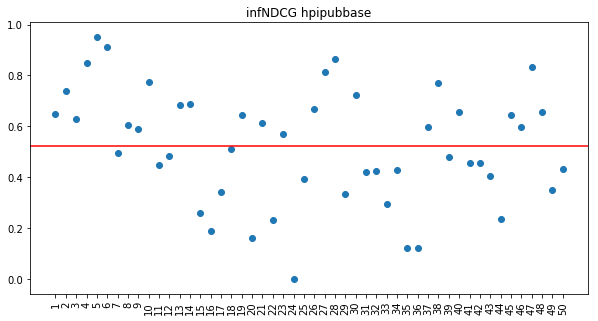

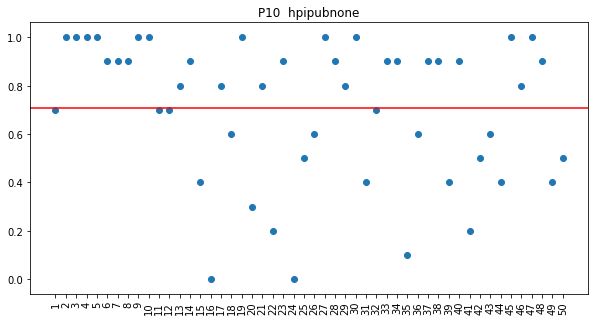

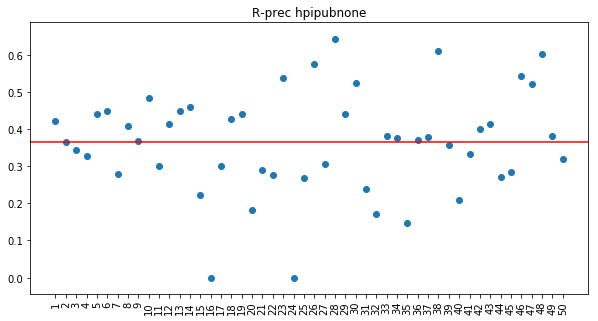

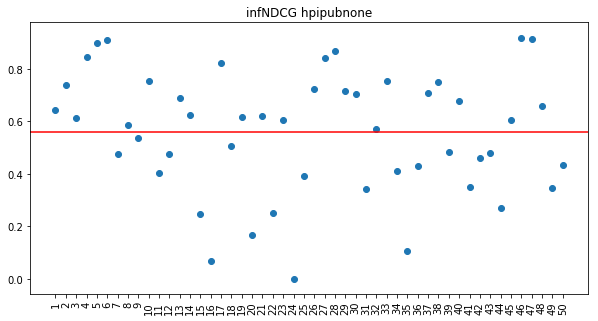

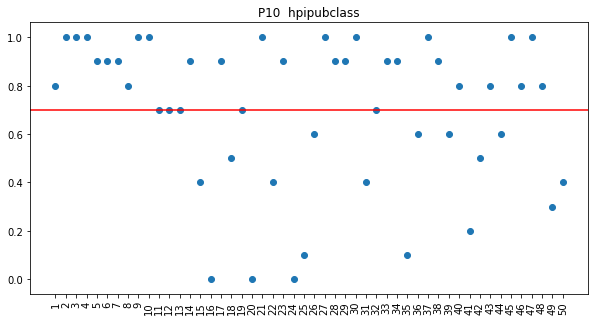

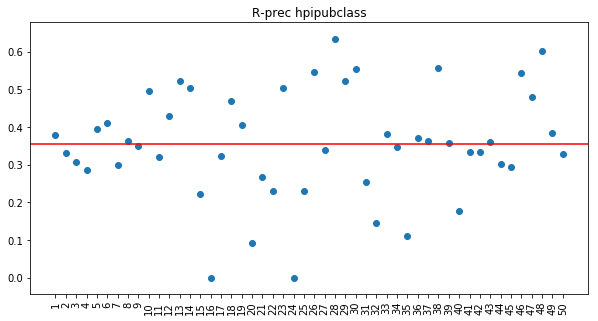

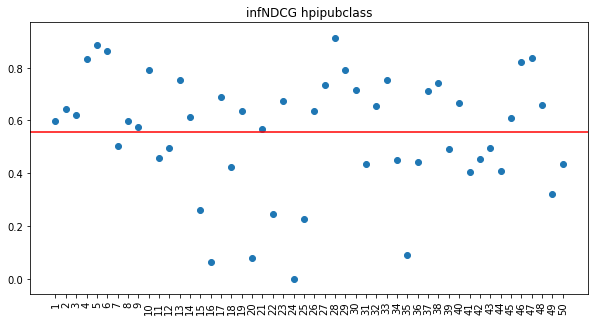

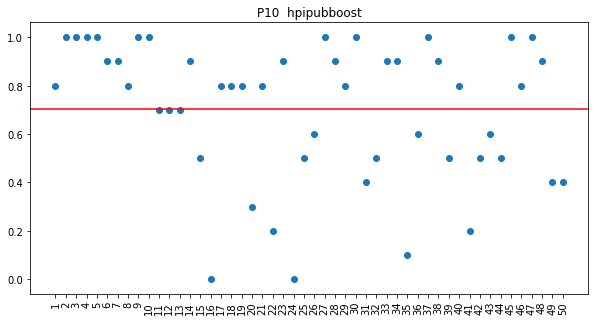

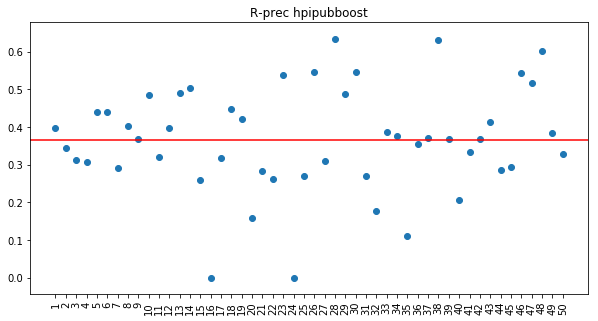

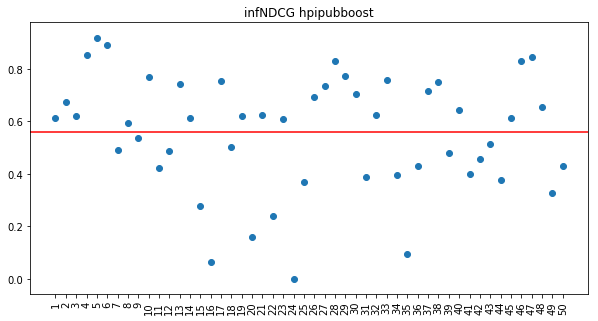

In [16]:
for run in runs:
    for metric in metrics:
        makeGraph(run, metric)

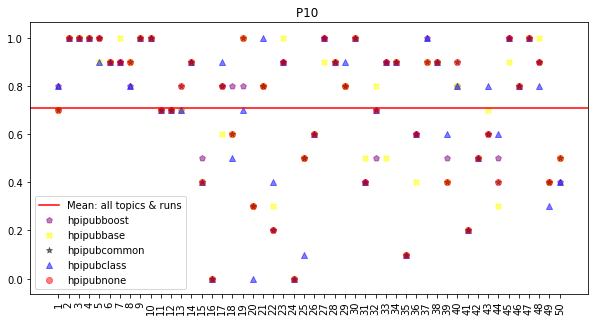

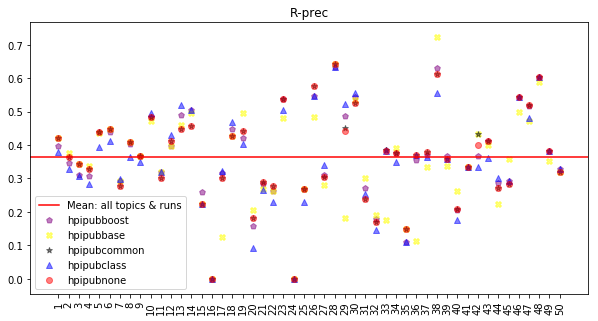

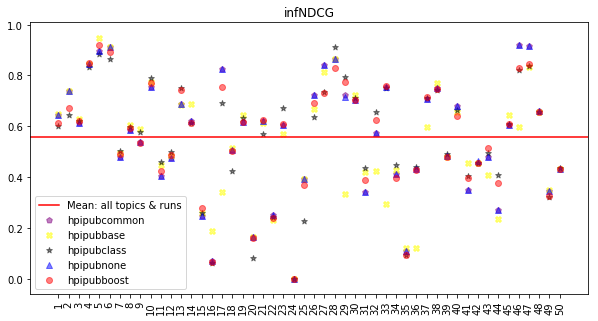

In [17]:
for metric in metrics:
    makeMetricGraph(metric)